# Projectile Motion Assignment: Due 9/21

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

# Equations of Motion
### x-component: 
$$F_{x} = ma_{x} = 0 \implies a_{x}=0$$ 
$$a_{x} = 0 = \frac{dv_{x}}{dt} \implies v_{x} = \int 0\, \mathrm{d}t \implies v_{x} = v_{0}\cos(\theta)$$
### y-component: 
$$F_{y} = ma_{y} = mg \implies a_{y} = g$$
$$a_{y} = g = \frac{dv_{y}}{dt} \implies v_{y} = \int g\, \mathrm{d}t \implies v_{y} = v_{0}\sin(\theta)+gt $$

Code the equations into a function 

In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib notebook

def proj_vac(t,x,theta,g):
        return np.array([x[1]+((-g)*(t)),(-g)*t])

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [17]:
#code
g=[0,9.81]
theta = (math.pi/180)*50 #radians
v0 = 300.0 #m/s
v0_x = v0*math.cos(theta)
v0_y = v0*math.sin(theta)
#initial value
init_xValue = np.array([0,v0_x]) #m & m/s
init_yValue = np.array([0,v0_y]) #m & m/s

t0 = 0 #s
tf = 3.5 #s
n = 10000
t = np.linspace(t0,tf,n)

y_sol_RK45 = integrate.solve_ivp(proj_vac,(t0,tf),init_yValue,method='RK45',t_eval=t ,args =(theta,g[1]))
x_sol_RK45 = integrate.solve_ivp(proj_vac,(t0,tf),init_xValue,method='RK45',t_eval=t ,args =(theta,g[0]))

print('X-componet:\n position at each time interval:\n',x_sol_RK45.y[0])
print('\nY-componet:\n position at each time interval:\n',y_sol_RK45.y[0])



X-componet:
 position at each time interval:
 [0.00000000e+00 6.74994490e-02 1.34998898e-01 ... 6.74791991e+02
 6.74859491e+02 6.74926990e+02]

Y-componet:
 position at each time interval:
 [0.00000000e+00 8.04421097e-02 1.60883017e-01 ... 6.74064996e+02
 6.74112396e+02 6.74159790e+02]


Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

<IPython.core.display.Javascript object>


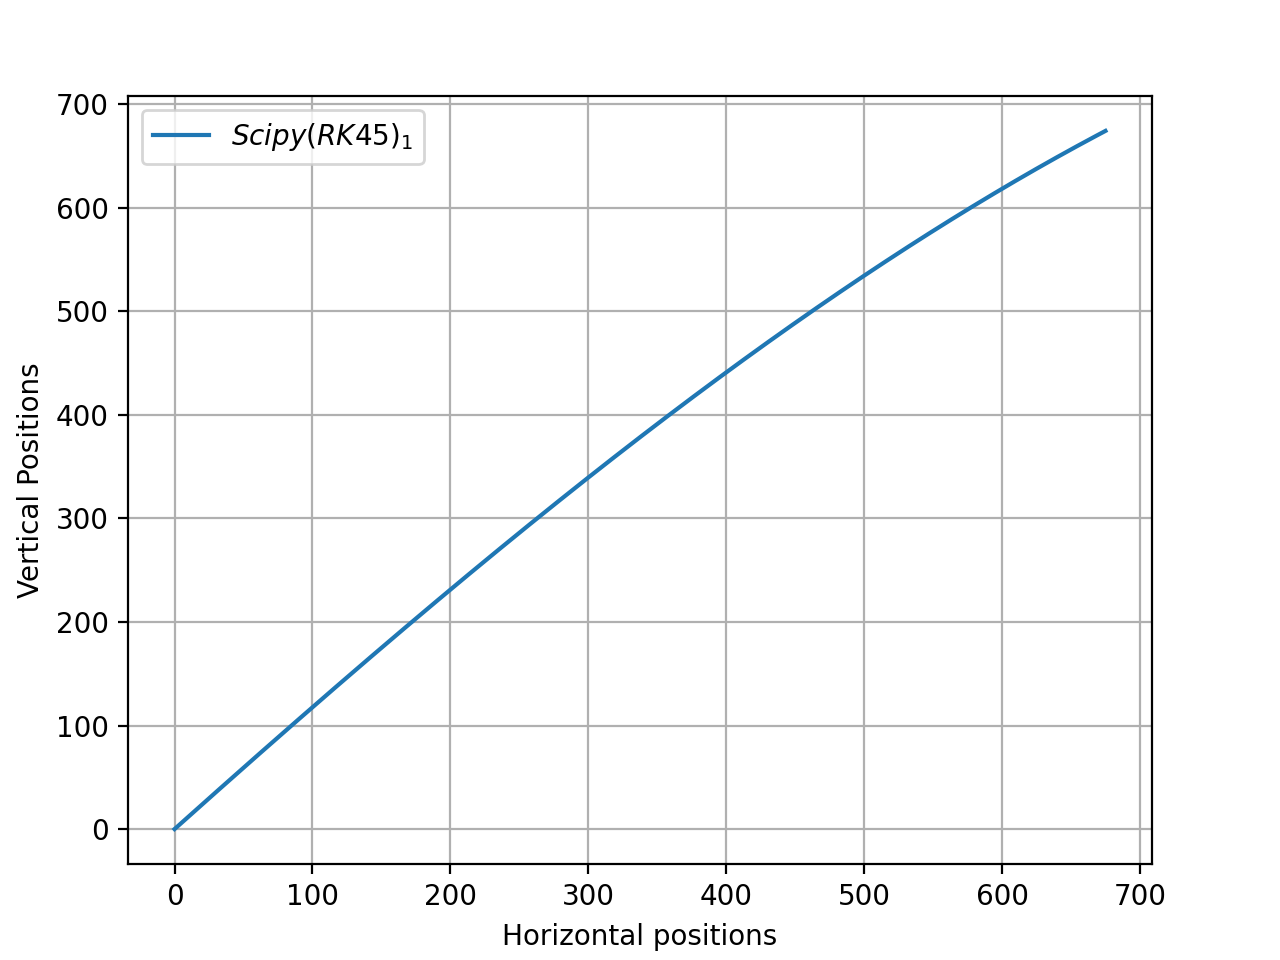

Horizontal Position: 674.9269901708667


In [18]:
#codes
fig = plt.figure('Scpy Runge-Kutta 1')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_xlabel('Horizontal positions')
ax.set_ylabel('Vertical Positions')
ax.grid();

ax.plot(x_sol_RK45.y[0],y_sol_RK45.y[0],label=r'$Scipy (RK45)_1$');

ax.legend(loc='best')

#range_equation = ((v0**2)*math.sin(2*theta))/(g[1])
#print('Horizontal range:',range_equation)

arr = x_sol_RK45.y[0]
last = arr[len(arr)-1]
print('Horizontal Position:',last)

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

<IPython.core.display.Javascript object>


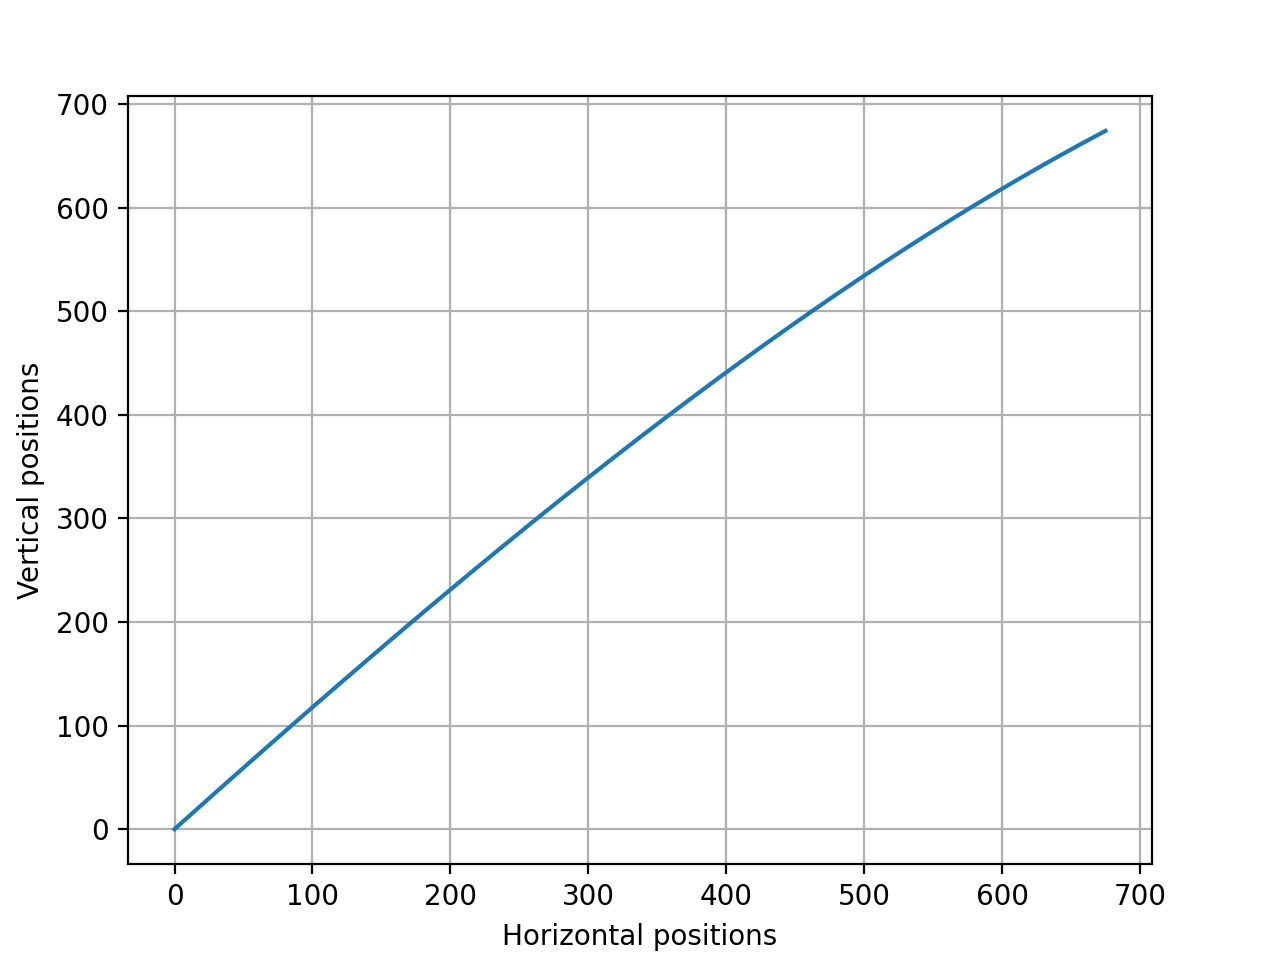

In [15]:
#codes
def rungekutta_x(f,t,init_xValue, args=()):
    n = len(t)
    x = np.zeros((n,len(init_xValue))) #n rows, len(y) columns i.e position and velocity
    x[0] = init_xValue
    for i in range (0,n-1):
        x[i+1] = x[i] + (t[i+1]-t[i])*f(t[i],x[i],*args)
    return x

def rungekutta_y(f,t,init_yValue, args=()):
    n = len(t)
    y = np.zeros((n,len(init_yValue))) #n rows, len(y) columns i.e position and velocity
    y[0] = init_yValue
    for i in range (0,n-1):
        y[i+1] = y[i] + (t[i+1]-t[i])*f(t[i],y[i],*args)
    return y
sol_rk1 = rungekutta_x(proj_vac,t,init_xValue,args=(theta,g[0]))
sol_rk2 = rungekutta_y(proj_vac,t,init_yValue,args=(theta,g[1]))

fig = plt.figure('Runge-Kutta 1')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(sol_rk1[ :,0],sol_rk2[ :,0])
#ax.plot(t,sol_rk1[ :,1], 'g', label=r'$v(t)$')
ax.set_xlabel('Horizontal positions')
ax.set_ylabel('Vertical positions')
ax.grid()

The scipy runge kutta gives a slightly better approximation of the projectile motion than the created runge kutta method. 

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

# Equations of Motion
### x-component: 
$$F_{x} = ma_{x} = 0 - cvv \implies ma_{x}=-c\sqrt{v_{x}^2+v_{y}^2}v $$ 
$$ $$
### y-component: 
$$F_{x} = ma_{x} = mg - cvv \implies ma_{x}=mg-c\sqrt{v_{x}^2+v_{y}^2}v $$ 

Code the equations into a function

In [5]:
#code
gamma = .25 #𝑁⋅s^2/𝑚^4
D = .15 #m
c = gamma*(D**2)
m = 7800

def proj_vac2(t,x_,theta,g,c):
        return np.array([x_[1]+((-g)*(t)),(-g)*t-(c*x_[1])])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [6]:
#codes
y_sol_RK45_2 = integrate.solve_ivp(proj_vac2,(t0,tf),init_yValue,method='RK45',t_eval=t ,args =(theta,g[1],c))
x_sol_RK45_2 = integrate.solve_ivp(proj_vac2,(t0,tf),init_xValue,method='RK45',t_eval=t ,args =(theta,g[0],c))

Plot the ball's trajecory and find it's horizontal range

<IPython.core.display.Javascript object>


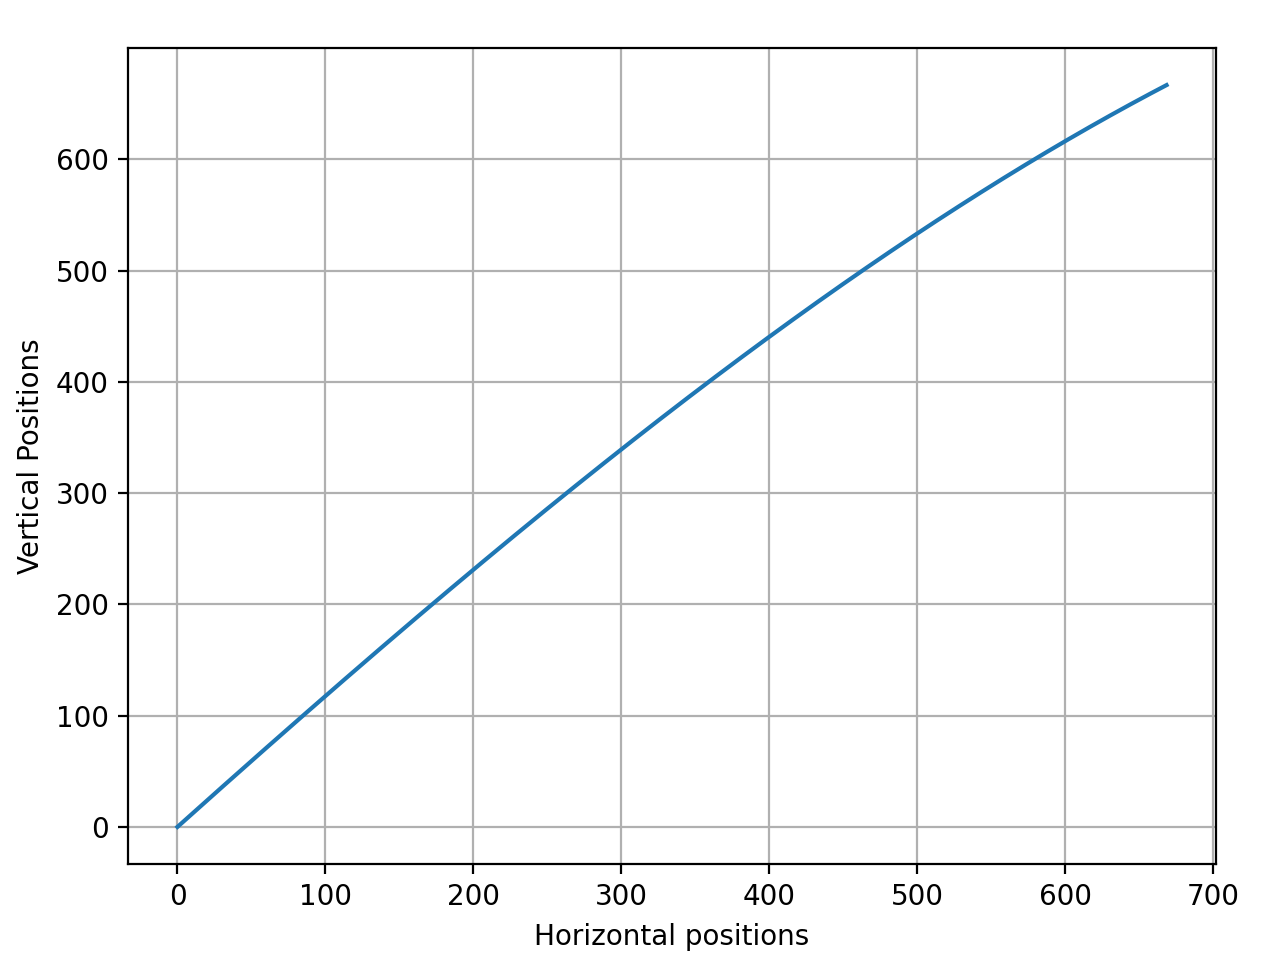

In [14]:
#codes
fig = plt.figure('Scpy Proj Motion w/air resistance')
ax = fig.add_axes([0.1,0.1,0.85,0.85])
ax.set_xlabel('Horizontal positions')
ax.set_ylabel('Vertical Positions')
ax.grid();

ax.plot(x_sol_RK45_2.y[0],y_sol_RK45_2.y[0],label=r'$Scipy (RK45)$');

#ax.legend(loc='best')

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [8]:
#code
gamma = .25 #𝑁⋅s^2/𝑚^4
Lambda = 10000 #m
D = .15 #m
c2 = gamma*(D**2)*math.exp((-init_yValue[1])/Lambda)
m = 7800

def proj_vac3(t,x_,theta,g,c):
        return np.array([x_[1]+((-g)*(t)),(-g)*t-(c2*x_[1])])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [9]:
#codes
y_sol_RK45_3 = integrate.solve_ivp(proj_vac3,(t0,tf),init_yValue,method='RK45',t_eval=t ,args =(theta,g[1],c))
x_sol_RK45_3 = integrate.solve_ivp(proj_vac3,(t0,tf),init_xValue,method='RK45',t_eval=t ,args =(theta,g[0],c))

Plot the ball's trajectory and find it's horizontal range

<IPython.core.display.Javascript object>


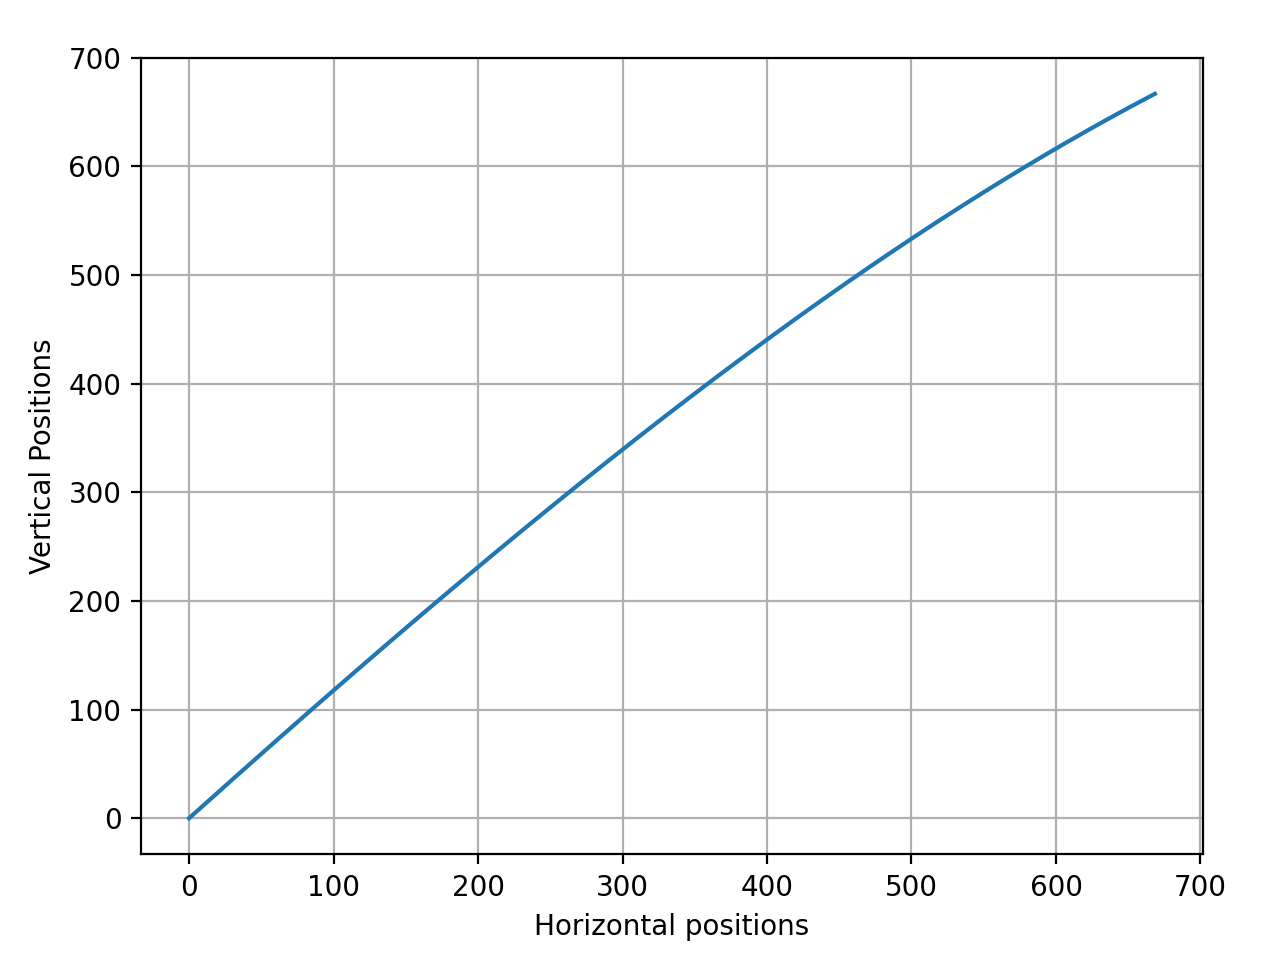

In [13]:
#codes
fig2 = plt.figure('Scpy Proj Motion w/drag and atmospheric variation')
ax = fig2.add_axes([0.11,0.11,0.83,0.83])
ax.set_xlabel('Horizontal positions')
ax.set_ylabel('Vertical Positions')
ax.grid();

ax.plot(x_sol_RK45_3.y[0],y_sol_RK45_3.y[0],label=r'$Scipy (RK45)$');

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

<IPython.core.display.Javascript object>


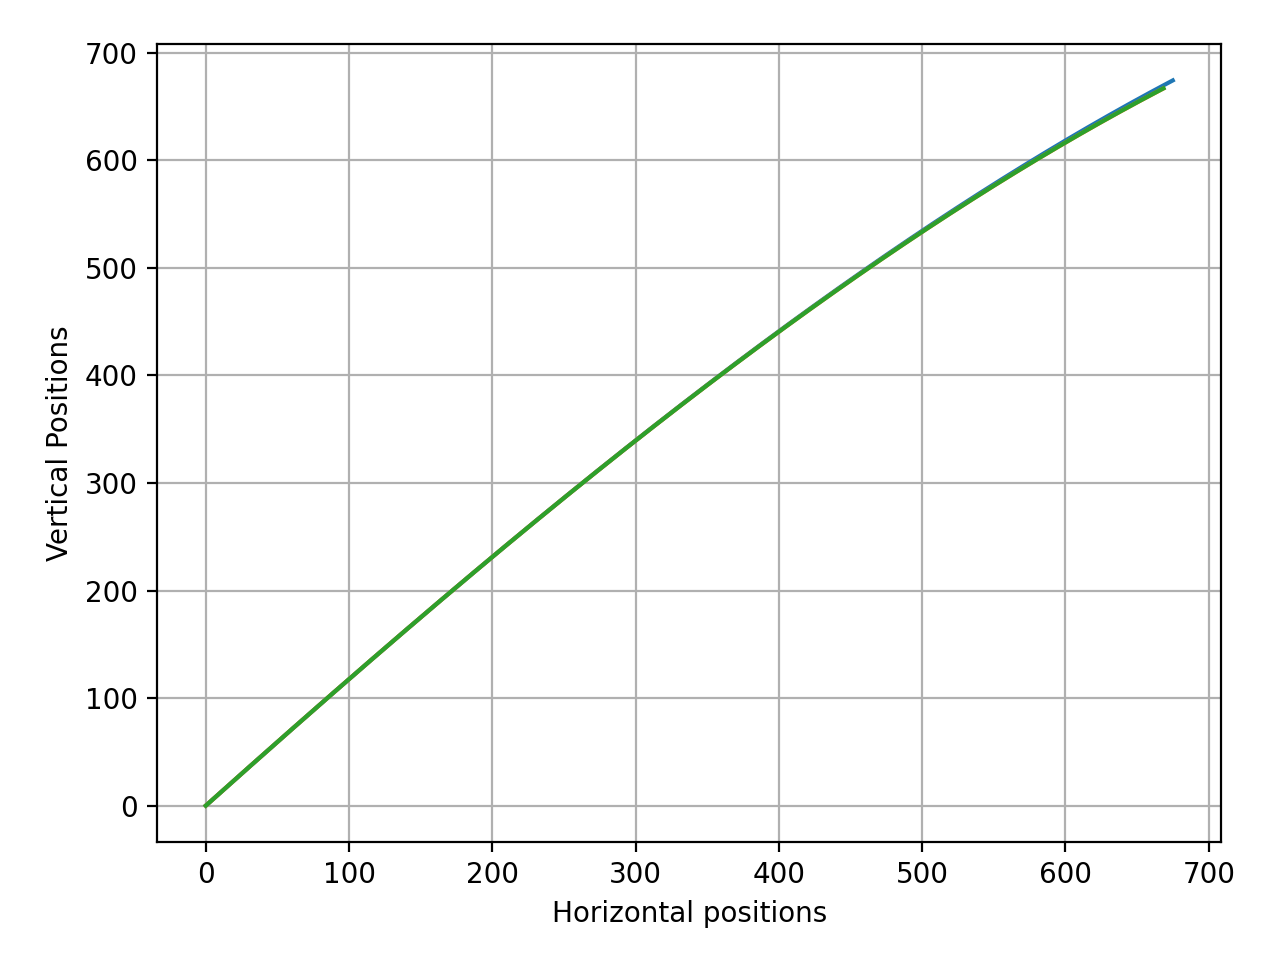

In [11]:
#codes
fig2 = plt.figure('Scpy Proj Motion All')
ax = fig2.add_axes([0.123,0.123,0.831,0.831])
ax.set_xlabel('Horizontal positions')
ax.set_ylabel('Vertical Positions')
ax.grid();

ax.plot(x_sol_RK45.y[0],y_sol_RK45.y[0],label=r'$Scipy (RK45)_1$');
ax.plot(x_sol_RK45_2.y[0],y_sol_RK45_2.y[0],label=r'$Scipy (RK45)$');
ax.plot(x_sol_RK45_3.y[0],y_sol_RK45_3.y[0],label=r'$Scipy (RK45)$');

Which impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$)

Turning on just air resistance impacts the motion more.